In [1]:
import os, sys

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from glob import glob
from ast import literal_eval

pd.options.display.max_columns = None

params = {
          'axes.titlesize': 15,   # Размер шрифта главной подписи
          'axes.labelsize': 14,   # Размер шрифта подписей осей
          'xtick.labelsize': 12,  # Размер шрифта подписей тикетов оси X
          'ytick.labelsize': 12,  # Размер шрифта подписей тикетов оси Y

          }

plt.rcParams.update(params)

__import__('warnings').filterwarnings("ignore")

name2index = {emotion: num for num, emotion in {0:"angry", 1:"sad", 2:"neutral", 3:"positive"}.items()}
num2emotion = {0: 'neutral', 1: 'angry', 2: 'positive', 3: 'sad', 4: 'other'}
emotion2num = {emotion: num for num, emotion in num2emotion.items()}

In [2]:
DATASET_PATH = r'D:\python-datasets\dusha'
DATASETS = ['podcast_train', 'podcast_test', 'asr_calls_2_val', 'ChatExport',
            'crowd_train', 'crowd_test']

In [3]:
ds_index = -1
dateset = os.path.join(DATASET_PATH, DATASETS[ds_index])
dateset_info = os.path.join(dateset, f'raw_{DATASETS[ds_index]}.tsv')
df = pd.read_csv(dateset_info, sep='\t')

In [4]:
df.head()

,hash_id,audio_path,duration,annotator_emo,golden_emo,annotator_id,speaker_text,speaker_emo,source_id
0,9e9961c53ca6eeb440b217e539fbf46c,wavs/9e9961c53ca6eeb440b217e539fbf46c.wav,5.82,neutral,NaN,858305a5450b7bd1288ba0053b1cd1c1,я слушаю,neutral,4282ddc30d71ef420e202e0c60391e9f
1,0166f65a30354db8282682b1a280e64c,wavs/0166f65a30354db8282682b1a280e64c.wav,3.70,sad,NaN,858305a5450b7bd1288ba0053b1cd1c1,каким стал сбер,neutral,d70dc98ed56e9362eaefefb7b2827c8f
2,d49a6b560155831725a7bdc7d0a96099,wavs/d49a6b560155831725a7bdc7d0a96099.wav,4.38,neutral,NaN,858305a5450b7bd1288ba0053b1cd1c1,где родился шерлок холмс,neutral,0ee35d2abecf4272ecc8e1539b0839d8
3,c6852b0925797612d7b6724da8cbe7b4,wavs/c6852b0925797612d7b6724da8cbe7b4.wav,8.58,neutral,NaN,858305a5450b7bd1288ba0053b1cd1c1,открой в браузере ennio morricone,neutral,0855e363c1787df1592f58f7a27ebe13
4,0166f65a30354db8282682b1a280e64c,wavs/0166f65a30354db8282682b1a280e64c.wav,3.70,sad,NaN,a5562e26cd8f1949488a2d1e1e549d97,каким стал сбер,neutral,d70dc98ed56e9362eaefefb7b2827c8f


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79088 entries, 0 to 79087
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   hash_id        79088 non-null  object 
 1   audio_path     79088 non-null  object 
 2   duration       79088 non-null  float64
 3   annotator_emo  79088 non-null  object 
 4   golden_emo     6998 non-null   float64
 5   annotator_id   79088 non-null  object 
 6   speaker_text   77833 non-null  object 
 7   speaker_emo    77833 non-null  object 
 8   source_id      77833 non-null  object 
dtypes: float64(2), object(7)
memory usage: 5.4+ MB


In [6]:
df.duration.describe()

count    79088.000000
mean         4.726625
std          1.477528
min          0.660125
25%          3.740000
50%          4.560000
75%          5.520000
max         21.849563
Name: duration, dtype: float64

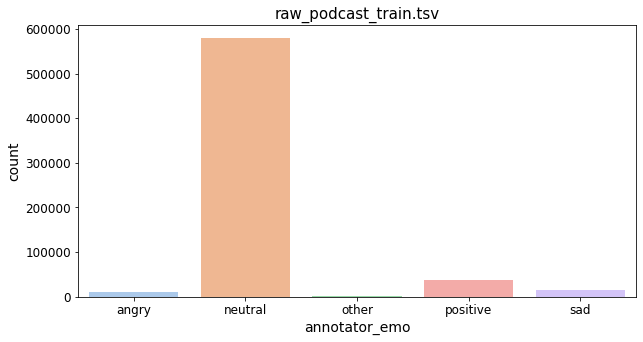

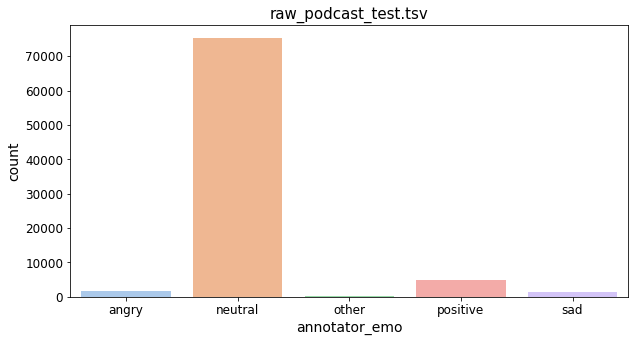

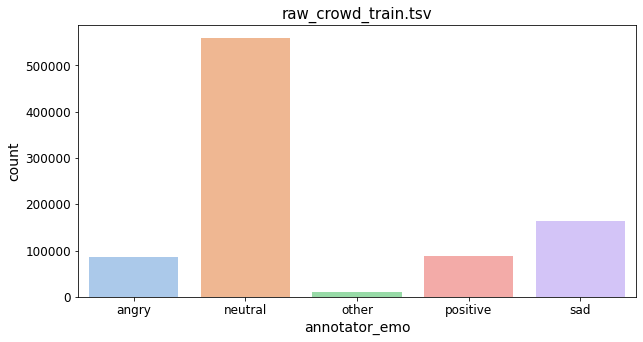

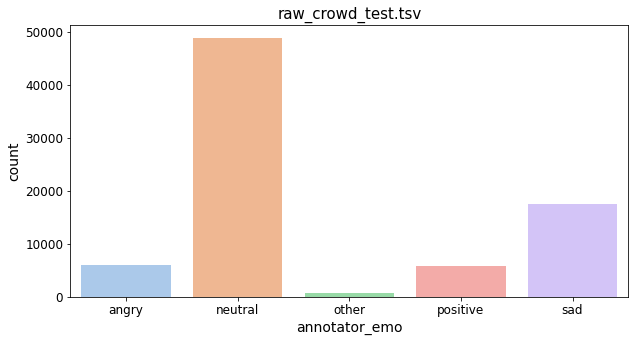

In [7]:
sns.set_palette("pastel")
for ds_path in DATASETS:
    if ds_path in ('asr_calls_2_val', 'ChatExport'):
        continue
    file_list = glob(os.path.join(DATASET_PATH, ds_path, '*.tsv'))
    for file in file_list:
        df = pd.read_csv(file, sep='\t')
        df.sort_values(by='annotator_emo', inplace=True)
        fig, ax = plt.subplots(figsize=(10, 5))
        plt.title(file.split('\\')[-1])
        sns.countplot(df.annotator_emo)
        plt.show()

In [8]:
df["speaker_emo"].fillna(df["annotator_emo"], inplace=True)

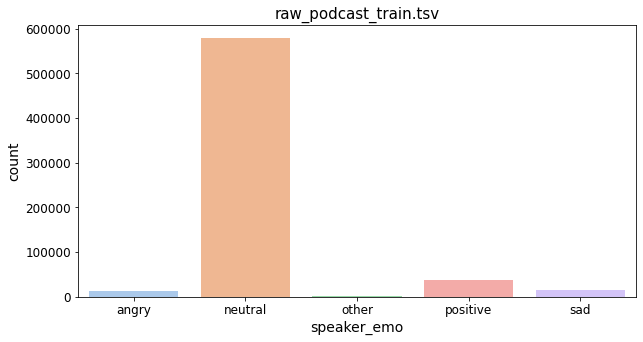

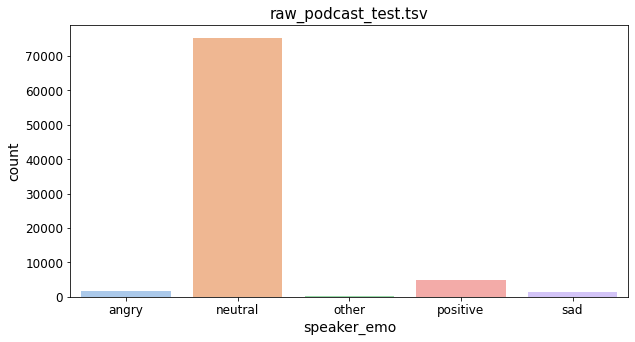

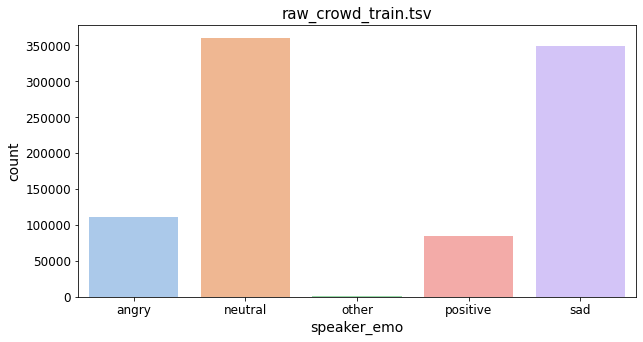

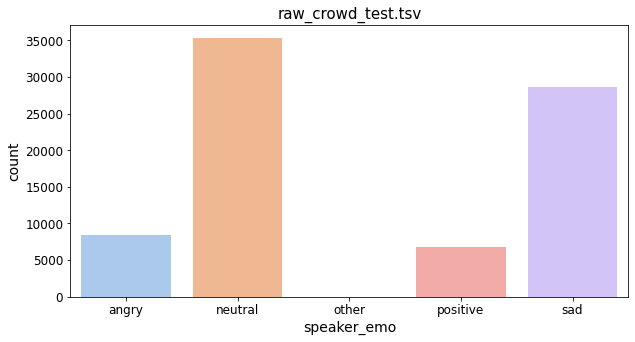

In [9]:
sns.set_palette("pastel")
for ds_path in DATASETS:
    if ds_path in ('asr_calls_2_val', 'ChatExport'):
        continue
    file_list = glob(os.path.join(DATASET_PATH, ds_path, '*.tsv'))
    for file in file_list:
        df = pd.read_csv(file, sep='\t')
        df["speaker_emo"].fillna(df["annotator_emo"], inplace=True)
        df.sort_values(by='speaker_emo', inplace=True)
        fig, ax = plt.subplots(figsize=(10, 5))
        plt.title(file.split('\\')[-1])
        sns.countplot(df.speaker_emo)
        plt.show()

In [10]:
df.sample(7)

,hash_id,audio_path,duration,annotator_emo,golden_emo,annotator_id,speaker_text,speaker_emo,source_id
65254,c7832c1d9c13f947f0628f8b9d7e86e7,wavs/c7832c1d9c13f947f0628f8b9d7e86e7.wav,3.30,neutral,NaN,22dfd02b50dbd35a4f42482c14c541ce,акустический концерт,neutral,6242fa8c649d19ad0a0d19dace69383c
56180,740391ec199e9e745f954ac46430d983,wavs/740391ec199e9e745f954ac46430d983.wav,4.58,neutral,NaN,59db5e63a0e312973f31bd85e55b90ef,включи группу винтаж,neutral,0e411b8c14aca164260fa933b512e9aa
77388,fa436e7c630646a13696e95283d9bc19,wavs/fa436e7c630646a13696e95283d9bc19.wav,3.34,sad,NaN,17d196344772058258b2311b6b040dd2,байдзи огурчик,sad,542c04beb66dc5394341400d7f146757
71290,76b65ca97d972aebe8eb1295ecee691c,wavs/76b65ca97d972aebe8eb1295ecee691c.wav,7.22,neutral,NaN,25cc45cff9fd28bf0ce110525a98e46c,поставь таймер на час,neutral,26cf6dbe24d68c96be4f8fed8e0393e2
65957,6657957c379bf1fb20d34adc22613e83,wavs/6657957c379bf1fb20d34adc22613e83.wav,4.54,neutral,3.0,afbac5212fc9378f26af0697624a8da2,красноярские новости,sad,d5d65297b9534c646b9adaa1e79126b6
54186,6ef20c22488837d4e6bffddd69653d59,wavs/6ef20c22488837d4e6bffddd69653d59.wav,6.60,neutral,NaN,b8a0b78e0d204ba055546e4af2896e38,смотреть как открывают новые скрепыши два,neutral,eacd49c1710fed2bf3285553fa8f92e7
28361,408dde9f058b88a5f6bce09d6da1d7aa,wavs/408dde9f058b88a5f6bce09d6da1d7aa.wav,3.04,sad,NaN,b66143224eb320faa7dfeeb7a9229060,орел и решка,sad,1cc50e3b6be7a6f1c6313165a975ce47


In [11]:
import os
import pandas as pd
from pathlib import Path
from sklearn.metrics import f1_score as F1, classification_report, roc_auc_score
from sklearn.preprocessing import LabelBinarizer

DATASET_PATH = r'D:\python-datasets\dusha'
DATASETS = ['podcast_train', 'podcast_test', 'asr_calls_2_val', 'ChatExport',
            'crowd_train', 'crowd_test']
WORK_PATH = Path('.')

dataset = DATASETS[-1]

crowd_test = os.path.join(DATASET_PATH, dataset)
crowd_info = os.path.join(crowd_test, f'raw_{dataset}.tsv')

pred_sber = WORK_PATH.joinpath('preds.csv')
pred_hubert = WORK_PATH.joinpath('preds_hb_crowd_test.csv')
pred_hubertp = WORK_PATH.joinpath('preds_hb_podcast_test.csv')

remap = {'sad': 'neutral', 'other': 'neutral'}

In [12]:
from sklearn.metrics import f1_score as F1, classification_report, roc_auc_score
from sklearn.preprocessing import LabelBinarizer


prs = pd.read_csv(pred_sber)
prs["speaker_emo"].fillna(prs["annotator_emo"], inplace=True)
prs.probs = prs.probs.map(lambda x: literal_eval(', '.join(x.split()))) 

tst = prs.copy()

remap = {'other': 'neutral'}

for col in ('annotator_emo', 'speaker_emo', 'pred'):
    prs[col] = prs[col].map(lambda x: remap.get(x, x))

remap = {'sad': 'neutral', 'other': 'neutral'}

for col in ('annotator_emo', 'speaker_emo', 'pred'):
    tst[col] = tst[col].map(lambda x: remap.get(x, x))

emos = {'4 emo': prs, '3 emo': tst}

for emo, df in emos.items():
    for name_col in ('annotator_emo', 'speaker_emo'):
        # Пример истинных меток и предсказанных вероятностей для многоклассовой классификации
        # Истинные метки классов
        y_true = df[name_col].map(name2index)  
        # Предсказанные вероятности для каждого класса
        y_scores = np.concatenate(df['probs'].values)  
        # Преобразуем истинные метки классов в бинарный формат
        lb = LabelBinarizer()
        y_true_bin = lb.fit_transform(y_true)
        n_emos = len(lb.classes_)
        roc_auc = roc_auc_score(y_true_bin, y_scores[:, :n_emos], average="micro") 
        
        print(f'f1_score ({emo}) по колонке {name_col:<13} =',
              F1(df[name_col], df['pred'], average='weighted', zero_division=0).round(4),
             'roc_auc_score = ', roc_auc.round(4))

f1_score (4 emo) по колонке annotator_emo = 0.5524 roc_auc_score =  0.8233
f1_score (4 emo) по колонке speaker_emo   = 0.4493 roc_auc_score =  0.7638
f1_score (3 emo) по колонке annotator_emo = 0.8006 roc_auc_score =  0.7277
f1_score (3 emo) по колонке speaker_emo   = 0.7032 roc_auc_score =  0.7116


In [13]:
print(classification_report(prs['annotator_emo'], prs['pred']))

              precision    recall  f1-score   support

       angry       0.82      0.22      0.35      1911
     neutral       0.72      0.55      0.62     10495
    positive       0.57      0.41      0.48      1730
         sad       0.34      0.81      0.48      3081

    accuracy                           0.55     17217
   macro avg       0.61      0.50      0.48     17217
weighted avg       0.65      0.55      0.55     17217



In [14]:
print(classification_report(tst['annotator_emo'], tst['pred']))

              precision    recall  f1-score   support

       angry       0.82      0.22      0.35      1911
     neutral       0.85      0.97      0.91     13576
    positive       0.57      0.41      0.48      1730

    accuracy                           0.83     17217
   macro avg       0.75      0.53      0.58     17217
weighted avg       0.82      0.83      0.80     17217



In [15]:
# результаты второй модели
phb = pd.read_csv(pred_hubert)
phb["speaker_emo"].fillna(phb["annotator_emo"], inplace=True)
phb.probs = phb.probs.map(lambda x: literal_eval(', '.join(x.split()))) 
tst = phb.copy()

for col in ('annotator_emo', 'speaker_emo', 'pred'):
    tst[col] = tst[col].map(lambda x: remap.get(x, x))

emos = {'5 emo': phb, '3 emo': tst}
true_columns = ('annotator_emo', 'speaker_emo')

for emo, df in emos.items():
    for name_col in ('annotator_emo', 'speaker_emo'):
        # Пример истинных меток и предсказанных вероятностей для многоклассовой классификации
        # Истинные метки классов
        y_true = df[name_col].map(emotion2num)  
        # Предсказанные вероятности для каждого класса
        y_scores = np.concatenate(df['probs'].values)  
        # Преобразуем истинные метки классов в бинарный формат
        lb = LabelBinarizer()
        y_true_bin = lb.fit_transform(y_true)
        n_emos = len(lb.classes_)
        roc_auc = roc_auc_score(y_true_bin, y_scores[:, :n_emos], average="micro") 
        
        print(f'f1_score ({emo}) по колонке {name_col:<13} =',
              F1(df[name_col], df['pred'], average='weighted', zero_division=0).round(4),
             'roc_auc_score = ', roc_auc.round(4))

f1_score (5 emo) по колонке annotator_emo = 0.7178 roc_auc_score =  0.9342
f1_score (5 emo) по колонке speaker_emo   = 0.7313 roc_auc_score =  0.9164
f1_score (3 emo) по колонке annotator_emo = 0.9657 roc_auc_score =  0.9736
f1_score (3 emo) по колонке speaker_emo   = 0.9003 roc_auc_score =  0.9484


In [16]:
for emo, df in emos.items():
    for name_col in ('annotator_emo', 'speaker_emo'):
        print(f'{emo} по колонке {name_col:<13}:')
        print(classification_report(df[name_col], df['pred'], zero_division=0))
        # print(roc_auc_score(df[name_col], df['pred']))

5 emo по колонке annotator_emo:
              precision    recall  f1-score   support

       angry       0.85      0.88      0.86      1278
     neutral       0.74      0.83      0.78     10372
       other       0.89      0.31      0.46       377
    positive       0.83      0.85      0.84      1015
         sad       0.60      0.48      0.54      4944

    accuracy                           0.73     17986
   macro avg       0.78      0.67      0.70     17986
weighted avg       0.72      0.73      0.72     17986

5 emo по колонке speaker_emo  :
              precision    recall  f1-score   support

       angry       0.92      0.60      0.73      2019
     neutral       0.67      0.93      0.78      8320
       other       0.00      0.00      0.00         0
    positive       0.88      0.57      0.69      1594
         sad       0.85      0.56      0.68      6053

    accuracy                           0.74     17986
   macro avg       0.66      0.53      0.57     17986
weighted avg 

In [17]:
# результаты второй модели на 'podcast_test'
phb = pd.read_csv(pred_hubertp)
phb["speaker_emo"].fillna(phb["annotator_emo"], inplace=True)
phb.probs = phb.probs.map(lambda x: literal_eval(', '.join(x.split()))) 

In [18]:
tst = phb.copy()

for col in ('annotator_emo', 'speaker_emo', 'pred'):
    tst[col] = tst[col].map(lambda x: remap.get(x, x))

emos = {'5 emo': phb, '3 emo': tst}
true_columns = ('annotator_emo', 'speaker_emo')
        
for emo, df in emos.items():
    for name_col in ('annotator_emo', ):
        # Пример истинных меток и предсказанных вероятностей для многоклассовой классификации
        # Истинные метки классов
        y_true = df[name_col].map(emotion2num)  
        # Предсказанные вероятности для каждого класса
        y_scores = np.concatenate(df['probs'].values)  
        # Преобразуем истинные метки классов в бинарный формат
        lb = LabelBinarizer()
        y_true_bin = lb.fit_transform(y_true)
        n_emos = len(lb.classes_)
        roc_auc = roc_auc_score(y_true_bin, y_scores[:, :n_emos], average="micro") 
        
        print(f'f1_score ({emo}) по колонке {name_col:<13} =',
              F1(df[name_col], df['pred'], average='weighted', zero_division=0).round(4),
             'roc_auc_score = ', roc_auc.round(4))      

f1_score (5 emo) по колонке annotator_emo = 0.8174 roc_auc_score =  0.8951
f1_score (3 emo) по колонке annotator_emo = 0.8332 roc_auc_score =  0.8951


In [19]:
(roc_auc_score(y_true_bin, y_scores[:, :n_emos], average="micro"), 
roc_auc_score(y_true_bin, y_scores[:, :n_emos], average="macro"), 
roc_auc_score(y_true_bin, y_scores[:, :n_emos], average="weighted") )

(0.8951490321818083, 0.9273721895962813, 0.9096931045035455)

In [20]:
for emo, df in emos.items():
    for name_col in ('annotator_emo', ):
        print(f'{emo} по колонке {name_col:<13}:')
        print(classification_report(df[name_col], df['pred'], zero_division=0))
        # print(roc_auc_score(df[name_col], df['pred']))

5 emo по колонке annotator_emo:
              precision    recall  f1-score   support

       angry       0.02      0.91      0.03        23
     neutral       1.00      0.71      0.83      9865
       other       0.00      0.00      0.00         0
    positive       0.06      0.83      0.11        99
         sad       0.00      0.00      0.00         0

    accuracy                           0.71      9987
   macro avg       0.21      0.49      0.19      9987
weighted avg       0.99      0.71      0.82      9987

3 emo по колонке annotator_emo:
              precision    recall  f1-score   support

       angry       0.02      0.91      0.03        23
     neutral       1.00      0.73      0.84      9865
    positive       0.06      0.83      0.11        99

    accuracy                           0.73      9987
   macro avg       0.36      0.82      0.33      9987
weighted avg       0.99      0.73      0.83      9987



In [21]:
pred_mp3 = WORK_PATH.joinpath('from_mp3.csv')
mp3 = pd.read_csv(pred_mp3)

In [22]:
mp3

,file,pred
0,Звонок в ТехПоддержку САРРАСАРРА ВЕЙ ИЗ МИР Ш...,positive
1,Звонок в техподдержку КорбинаТелеком Во дает.mp3,angry
2,Corbina — Звонок в техподдержку.mp3,positive
3,Звонок в техподдержку MegaFon Неслышат звонок...,angry
4,Nightmare Звонок в техподдержку Rambler.mp3,neutral
...,...,...
165,Звонок в техподдержку — Интернет без.mp3,neutral
166,Звонок в техподдержку — Ошибка.mp3,angry
167,Звонок в техподдержку майкрософт с просьбой к...,positive
168,КОРБИНА — Нет Интернета.mp3,positive


In [23]:
mp3.pred.value_counts()

positive    74
neutral     54
angry       35
other        7
Name: pred, dtype: int64

#### Результаты подбора параметров разделения аудиофайла на слова по паузам

In [24]:
res = pd.read_csv('results_calc_words.csv')
res

,dataset,min_silence_len,silence_thresh,N_words,precision,recall,f1,MAE,RMSE,R2
0,asr_calls_2_val,50,-22,3,1,0.866564,0.928512,1.832819,2.644073,0
1,asr_calls_2_val,50,-21,3,1,0.864324,0.927225,1.826486,2.628754,0
2,asr_calls_2_val,50,-20,3,1,0.862857,0.926380,1.827490,2.642130,0
3,asr_calls_2_val,50,-23,3,1,0.862703,0.926291,1.851042,2.674706,0
4,asr_calls_2_val,50,-19,3,1,0.860232,0.924865,1.856525,2.668854,0
...,...,...,...,...,...,...,...,...,...,...
2223,crowd_test,300,-16,0,1,0.088185,0.162077,2.667890,3.455697,0
2224,crowd_test,300,-15,3,1,0.702808,0.825469,2.897137,3.675018,0
2225,crowd_test,300,-15,2,1,0.503976,0.670191,2.897137,3.675018,0
2226,crowd_test,300,-15,1,1,0.260940,0.413881,2.897137,3.675018,0


In [25]:
n_words = sorted(res.N_words.unique())
show_f1 = ['dataset', 'min_silence_len', 'silence_thresh', 'f1']
show_rmse = ['dataset', 'min_silence_len', 'silence_thresh', 'RMSE']
result = pd.DataFrame()
for n in n_words:
    tmp = res[res['N_words'] == n]
    tmp['max_F1'] = tmp.groupby('dataset')['f1'].transform('max')
    tmp['min_RMSE'] = tmp.groupby('dataset')['RMSE'].transform('min')
    print(f'\nПороговое количество слов: {n}')
    print('\nМаксимальный F1 по датасетам:')
    temp1 = tmp[tmp['max_F1'] == tmp['f1']].drop_duplicates(['dataset', 'f1'])[show_f1]
    result = pd.concat([result, temp1[show_f1[:-1]]])
    print(temp1)
    print('\nМинимальная RMSE по датасетам:')
    temp2 = tmp[tmp.min_RMSE == tmp['RMSE']].drop_duplicates(['dataset', 'RMSE'])[show_rmse]
    result = pd.concat([result, temp2[show_rmse[:-1]]])
    print(temp2)


Пороговое количество слов: 0

Максимальный F1 по датасетам:
              dataset  min_silence_len  silence_thresh        f1
291   asr_calls_2_val               50             -20  0.349057
483        chatexport               50             -29  0.211538
1463      crowd_train              100             -18  0.386151
1607       crowd_test              150             -20  0.409463

Минимальная RMSE по датасетам:
              dataset  min_silence_len  silence_thresh      RMSE
295   asr_calls_2_val               50             -21  2.628754
419        chatexport               50             -38  9.892160
1479      crowd_train              100             -25  2.977706
1655       crowd_test              100             -24  2.022173

Пороговое количество слов: 1

Максимальный F1 по датасетам:
              dataset  min_silence_len  silence_thresh        f1
110   asr_calls_2_val               50             -20  0.711763
458        chatexport              100             -26  0.396552
1

In [26]:
print(f'Оптимальная длительность паузы: {int(result.min_silence_len.mode().mean())} мСек')
print(f'Уровень шума в паузе: {int(result.silence_thresh.mode().mean())} дБ')

Оптимальная длительность паузы: 100 мСек
Уровень шума в паузе: -22 дБ
